In [1]:
import pandas as pd

# Load the dataset
file_path = 'clean_air_hour.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,City,Year,Month,Day,Hour,Times_Of_Day,Seasonality,PM2.5,PM10,NO,...,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015,1,1,1,0,0,90.747917,112.842721,1.00,...,36.37,23.607959,1.00,122.07,45.043974,0.0,0.0,0.0,480.638889,0
1,0,2015,1,1,2,0,0,90.747917,112.842721,0.02,...,19.73,23.607959,0.02,85.90,45.043974,0.0,0.0,0.0,480.638889,0
2,0,2015,1,1,3,0,0,90.747917,112.842721,0.08,...,11.08,23.607959,0.08,52.83,45.043974,0.0,0.0,0.0,480.638889,0
3,0,2015,1,1,4,0,0,90.747917,112.842721,0.30,...,9.20,23.607959,0.30,39.53,153.580000,0.0,0.0,0.0,480.638889,0
4,0,2015,1,1,5,0,0,90.747917,112.842721,0.12,...,7.85,23.607959,0.12,32.63,45.043974,0.0,0.0,0.0,480.638889,0


In [2]:
from scipy.stats import chi2_contingency

# Prepare the data for Chi-Squared tests
month_crosstab = pd.crosstab(data['Month'], data['AQI_Bucket'])
times_of_day_crosstab = pd.crosstab(data['Times_Of_Day'], data['AQI_Bucket'])

# Perform the Chi-Squared test for Month vs AQI_Bucket
chi2_stat_month, p_val_month, dof_month, ex_month = chi2_contingency(month_crosstab)

# Perform the Chi-Squared test for Times_Of_Day vs AQI_Bucket
chi2_stat_times_of_day, p_val_times_of_day, dof_times_of_day, ex_times_of_day = chi2_contingency(times_of_day_crosstab)

chi2_stat_month, p_val_month, chi2_stat_times_of_day, p_val_times_of_day


(114987.79323247194, 0.0, 2622.4918102588604, 0.0)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the features and target variable
X = data[['Month', 'Times_Of_Day']]
y = data['AQI_Bucket']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
classification_report_test = classification_report(y_test, y_pred, output_dict=True)

# Get the feature importances
feature_importances = rf_classifier.feature_importances_

classification_report_test, feature_importances


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

({'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6176},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14675},
  '2': {'precision': 0.40610987816477195,
   'recall': 0.7239221701921524,
   'f1-score': 0.5203249673581896,
   'support': 49544},
  '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 12940},
  '4': {'precision': 0.43517511168722944,
   'recall': 0.46946012086100986,
   'f1-score': 0.45166792797338046,
   'support': 40046},
  '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8136},
  'accuracy': 0.415657291452816,
  'macro avg': {'precision': 0.14021416497533357,
   'recall': 0.19889704850886036,
   'f1-score': 0.161998815888595,
   'support': 131517},
  'weighted avg': {'precision': 0.28549412111302913,
   'recall': 0.415657291452816,
   'f1-score': 0.33354223428466384,
   'support': 131517}},
 array([0.97967764, 0.02032236]))

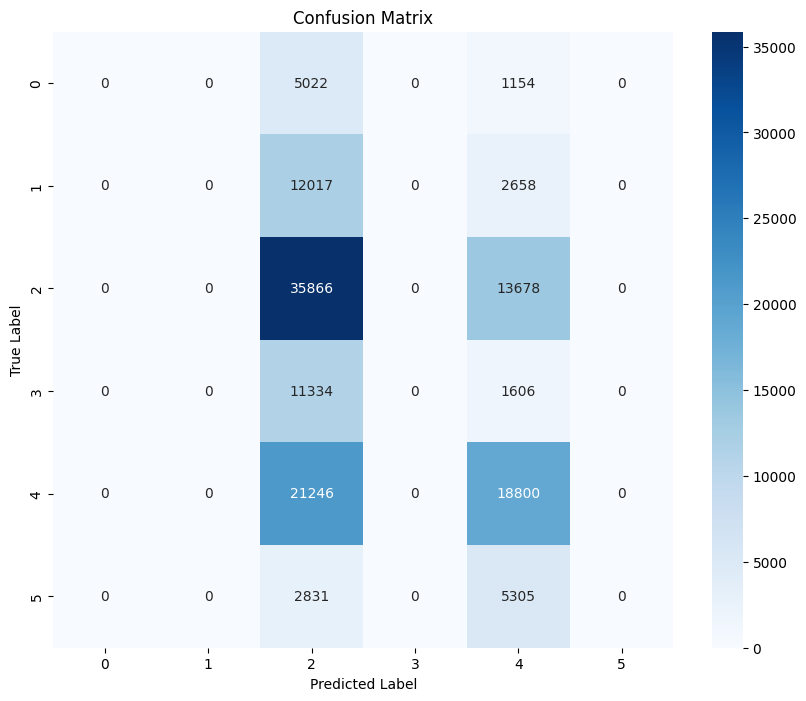

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


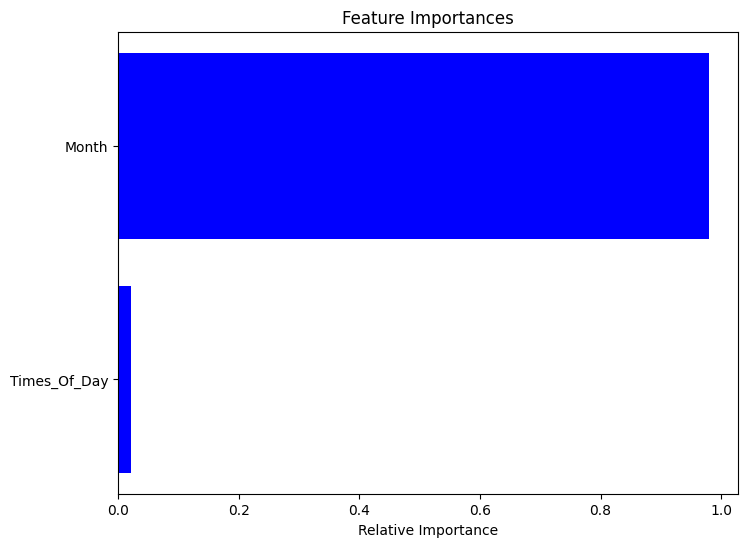

In [5]:
import numpy as np
# Plot the feature importances
features = X.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


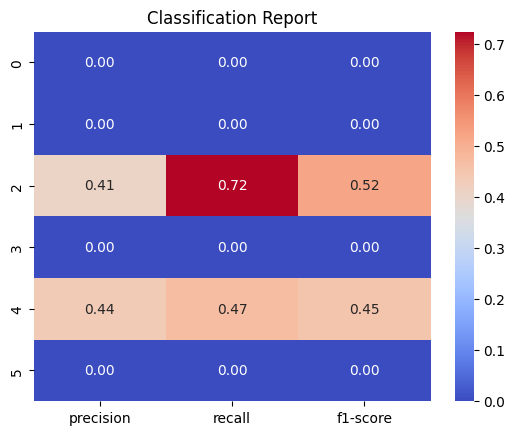

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,6176.000000
1,0.000000,0.000000,0.000000,14675.000000
2,0.406110,0.723922,0.520325,49544.000000
3,0.000000,0.000000,0.000000,12940.000000
4,0.435175,0.469460,0.451668,40046.000000
5,0.000000,0.000000,0.000000,8136.000000
accuracy,0.415657,0.415657,0.415657,0.415657
macro avg,0.140214,0.198897,0.161999,131517.000000
weighted avg,0.285494,0.415657,0.333542,131517.000000


In [6]:
# Convert the classification report into a DataFrame
classification_report_df = pd.DataFrame(classification_report_test).transpose()

# Visualize the classification report
sns.heatmap(classification_report_df.iloc[:-3, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.show()

classification_report_df


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier(random_state=42)

# List of models for iteration
models = [
    ('Logistic Regression', logistic_model),
    ('K-Nearest Neighbors', knn_model),
    ('Decision Tree', decision_tree_model)
]

# Dictionary to hold the classification reports for each model
classification_reports = {}

# Train, predict, and evaluate each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    classification_reports[model_name] = classification_report(y_test, y_pred, output_dict=True)

# Show the performance metrics for the Random Forest model for comparison
classification_reports['Random Forest'] = classification_report_test

# Now we have the classification reports for all models, let's display them
classification_reports.keys()


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

dict_keys(['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest'])

In [8]:
import pandas as pd

# Load the dataset
file_path = 'clean_air_hour.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)
month = 5
city = 9

# Function to find the best three Time_Of_Day with the least AQI_Bucket for a given month and city
def find_best_times_of_day(data, month, city_index):
    # Filter data for the given month and city
    filtered_data = data[(data['Month'] == month) & (data['City'] == city_index)]
    
    # Group by 'Times_Of_Day' and calculate the mean AQI for each time of day
    aqi_time_of_day = filtered_data.groupby('Times_Of_Day')['AQI'].mean().reset_index()
    
    # Sort the results to find the least mean AQI which indicates the least pollution
    best_times_of_day = aqi_time_of_day.sort_values(by='AQI').head(3)
    
    return best_times_of_day

# Replace 'your_month' with the month number and 'your_city_index' with the city index
best_times = find_best_times_of_day(data, month, city)

print(f"The top 3 Times_Of_Day with the least AQI in month {month} for city index {city} are:")
print(best_times[['Times_Of_Day', 'AQI']].to_string(index=False))


The top 3 Times_Of_Day with the least AQI in month 5 for city index 9 are:
 Times_Of_Day       AQI
            4 57.890244
            3 58.062500
            2 58.100629


In [9]:
import pandas as pd

# Load the dataset
file_path = 'clean_air_hour.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Function to find the best three Time_Of_Day with the least AQI_Bucket for a given day, month, and city
def find_best_times_of_day(data, day, month, city_index):
    # Filter data for the given day, month, and city
    filtered_data = data[(data['Day'] == day) & (data['Month'] == month) & (data['City'] == city_index)]
    
    # Group by 'Times_Of_Day' and calculate the mean AQI for each time of day
    aqi_time_of_day = filtered_data.groupby('Times_Of_Day')['AQI'].mean().reset_index()
    
    # Sort the results to find the least mean AQI which indicates the least pollution
    best_times_of_day = aqi_time_of_day.sort_values(by='AQI').head(3)
    
    return best_times_of_day

# Input values for day, month, and city index
day = 25  # replace with your day
month = 3  # replace with your month
city = 1   # replace with your city index

# Perform the analysis
best_times = find_best_times_of_day(data, day, month, city)

print(f"The top 3 Times_Of_Day with the least AQI on day {day}, month {month} for city index {city} are:")
print(best_times[['Times_Of_Day', 'AQI']].to_string(index=False))


The top 3 Times_Of_Day with the least AQI on day 25, month 3 for city index 1 are:
 Times_Of_Day       AQI
            1 90.000000
            0 91.090909
            2 91.500000


Accuracy: 0.598257259517781
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      6176
           1       0.46      0.36      0.40     14675
           2       0.63      0.70      0.66     49544
           3       0.52      0.50      0.51     12940
           4       0.63      0.64      0.63     40046
           5       0.59      0.45      0.51      8136

    accuracy                           0.60    131517
   macro avg       0.56      0.53      0.54    131517
weighted avg       0.59      0.60      0.59    131517



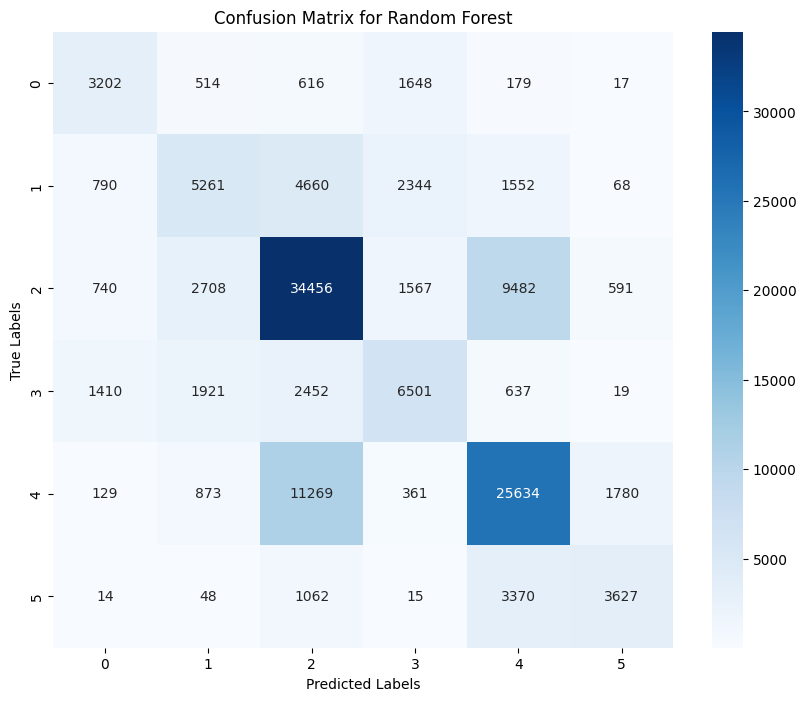

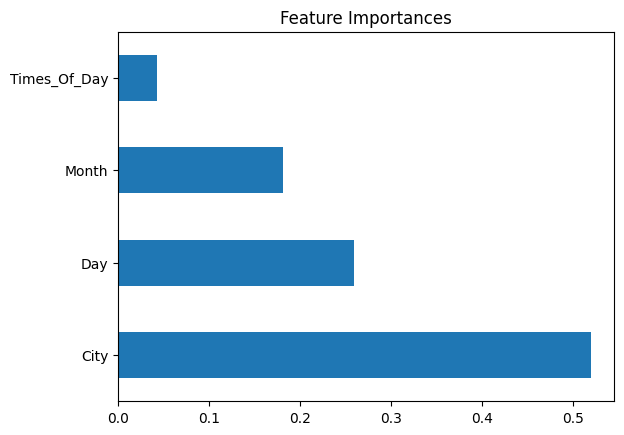

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'clean_air_hour.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Preprocess the data
# Assume 'Times_Of_Day' is already in a format that the ML algorithm can understand (e.g., 0 for morning, 1 for afternoon, etc.)
features = ['City', 'Month', 'Day', 'Times_Of_Day']  # Include other relevant features
target = 'AQI_Bucket'


# Split the dataset
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Optional: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# If you want to plot feature importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()



Accuracy: 0.38524297239140187


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6176
           1       0.00      0.00      0.00     14675
           2       0.40      0.87      0.55     49544
           3       0.00      0.00      0.00     12940
           4       0.32      0.18      0.23     40046
           5       0.00      0.00      0.00      8136

    accuracy                           0.39    131517
   macro avg       0.12      0.18      0.13    131517
weighted avg       0.25      0.39      0.28    131517



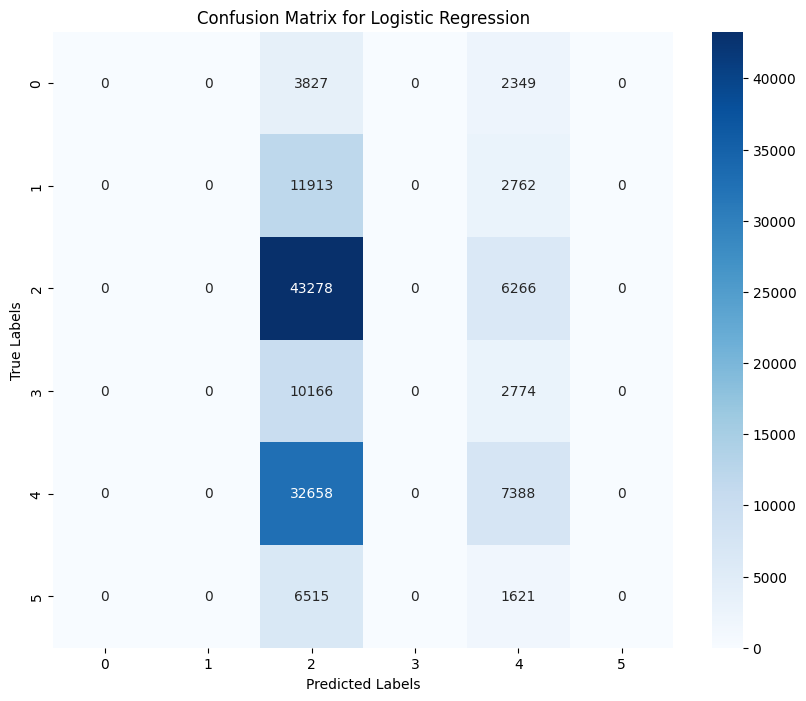

In [11]:
# Train the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr}')
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.5682003087053384
              precision    recall  f1-score   support

           0       0.44      0.53      0.48      6176
           1       0.39      0.40      0.40     14675
           2       0.61      0.67      0.64     49544
           3       0.51      0.42      0.46     12940
           4       0.62      0.59      0.60     40046
           5       0.58      0.42      0.49      8136

    accuracy                           0.57    131517
   macro avg       0.52      0.51      0.51    131517
weighted avg       0.57      0.57      0.57    131517



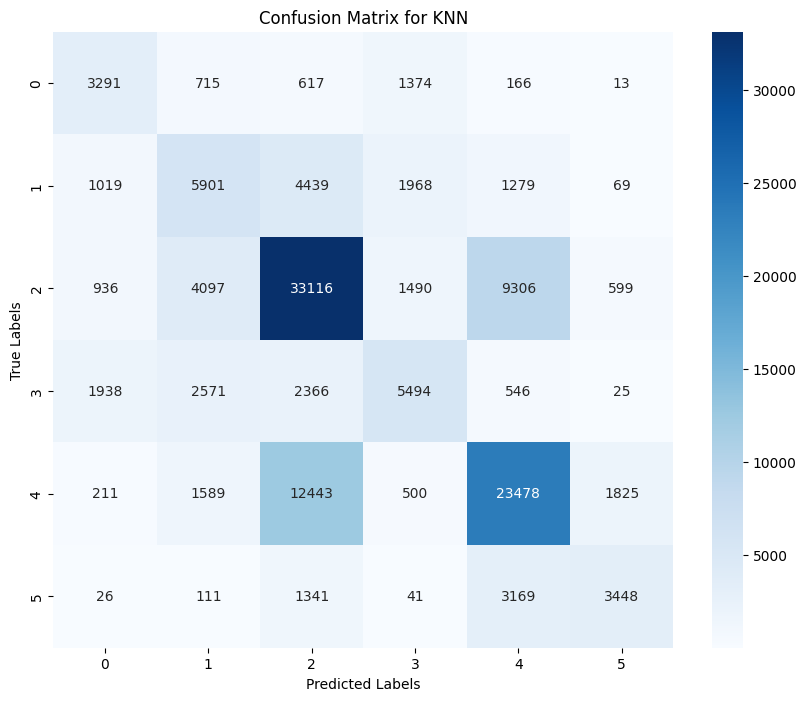

In [12]:
# Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # n_neighbors can be tuned
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn}')
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

Accuracy: 0.3994768737121437
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6176
           1       0.00      0.00      0.00     14675
           2       0.40      0.86      0.55     49544
           3       0.00      0.00      0.00     12940
           4       0.40      0.25      0.31     40046
           5       0.00      0.00      0.00      8136

    accuracy                           0.40    131517
   macro avg       0.13      0.18      0.14    131517
weighted avg       0.27      0.40      0.30    131517



c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

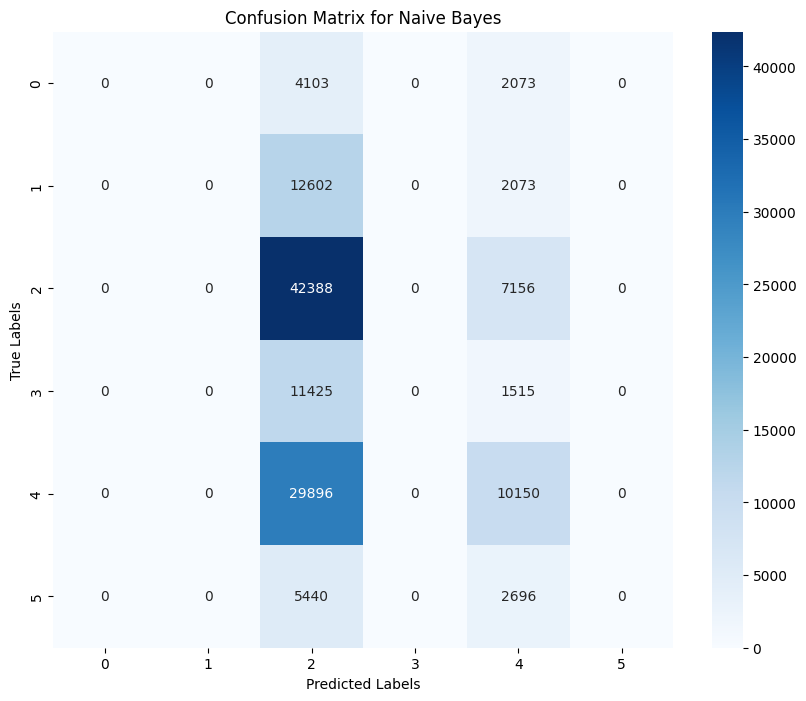

In [13]:
from sklearn.naive_bayes import GaussianNB
# Train the Naive Bayes classifier
nb_classifier = GaussianNB()  # Instantiate the Naive Bayes model
nb_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb}')
print(classification_report(y_test, y_pred_nb))

# Confusion matrix
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.599892029167332
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      6176
           1       0.45      0.38      0.42     14675
           2       0.63      0.71      0.67     49544
           3       0.54      0.48      0.51     12940
           4       0.64      0.63      0.63     40046
           5       0.63      0.42      0.50      8136

    accuracy                           0.60    131517
   macro avg       0.56      0.53      0.54    131517
weighted avg       0.60      0.60      0.60    131517



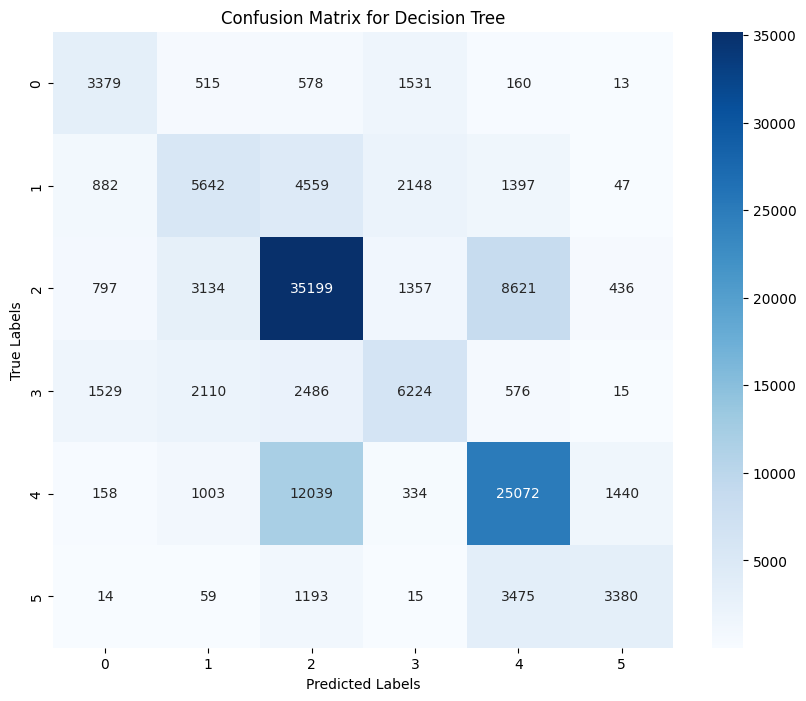

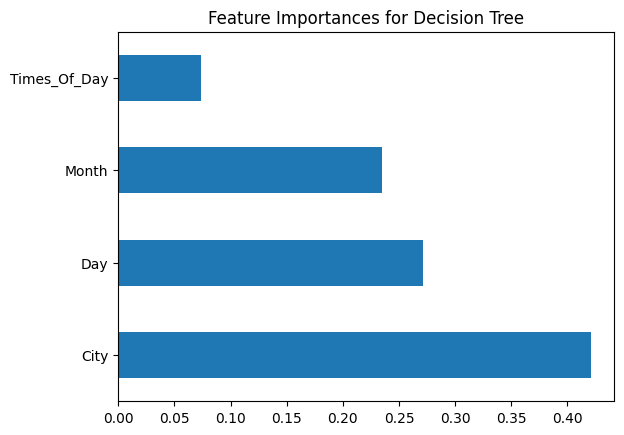

In [14]:
from sklearn.tree import DecisionTreeClassifier
# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt}')
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# If you want to plot feature importance
feature_importances_dt = pd.Series(dt_classifier.feature_importances_, index=X.columns)
feature_importances_dt.nlargest(10).plot(kind='barh')
plt.title('Feature Importances for Decision Tree')
plt.show()

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.5986754564048754
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      6176
           1       0.47      0.36      0.41     14675
           2       0.63      0.70      0.66     49544
           3       0.52      0.50      0.51     12940
           4       0.63      0.64      0.63     40046
           5       0.60      0.45      0.51      8136

    accuracy                           0.60    131517
   macro avg       0.56      0.53      0.54    131517
weighted avg       0.59      0.60      0.59    131517



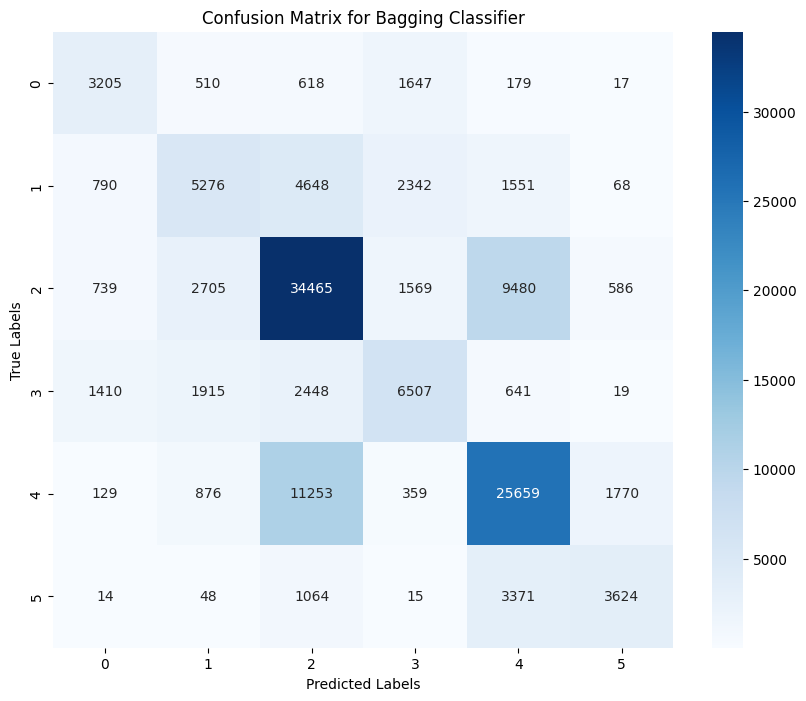

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Train the Bagging classifier with a DecisionTreeClassifier as the base estimator
bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_bagging = bagging_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f'Accuracy: {accuracy_bagging}')
print(classification_report(y_test, y_pred_bagging))

# Confusion matrix
conf_mat_bagging = confusion_matrix(y_test, y_pred_bagging)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_bagging, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Bagging Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()